# Communications Infrastructure Project

## Problem Statement

Despite significant growth in mobile technology adoption accross the world, there remains a disparity in access and usage of communcation devices among countries. Understanding the relationship between mobile phone penetration (number of phones per 100 people) and the number of subscribers can help identify regions with untapped potential, infrastructure gaps, or opportunities for targeted investment. This analysis aims to **provide insights** that can guide **policymakers, telcom companies, and development agencies** in **improving communication access and closing the digital divide.**

## Data Understanding

The data used in the analysis focuses on the **number of broadband subscribers** and the **mobile phone penetration in countries** in specific years.

In [1]:
# Importing necessary libraries for analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Reading and Previewing the Data

In [2]:
# Reading the csv file
comm = pd.read_csv('communication_infrastructure.csv')
comm.head()

,Year,Country,Broadband Subscribers / 100 ppl,Cell Phones per 100 People
0,2006,Afghanistan,0.00193,9.73
1,2006,Albania,NaN,62.50
2,2006,Algeria,0.50300,62.20
3,2006,Andorra,18.00000,85.20
4,2006,Angola,0.03680,15.10


In [3]:
# Printing the number of rows and columns in the dataframe
comm.shape

(2304, 4)

In [4]:
# Printing the column labels
comm.columns

Index(['Year', 'Country', 'Broadband Subscribers / 100 ppl',
       'Cell Phones per 100 People'],
      dtype='object')

In [5]:
# Printing the general summary of the dataframe
comm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2304 entries, 0 to 2303
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2304 non-null   int64  
 1   Country                          2304 non-null   object 
 2   Broadband Subscribers / 100 ppl  2144 non-null   float64
 3   Cell Phones per 100 People       2253 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 72.1+ KB


There are a total of **4 columns** and **2304 rows** in the dataset with majority of the columns having numerical data and one having categorical data.

There are missing values in 2 of the columns; **Broadband Subscribers / 100 ppl** and **Cell Phones per 100 People**.

## Data Cleaning

In [6]:
# Checking for null values in each column
comm.isnull().sum()

,0
Year,0
Country,0
Broadband Subscribers / 100 ppl,160
Cell Phones per 100 People,51


The missing values in the dataset seem to represent those countries that 'lack' broadband subscribers and cell phones per 100 people, therefore, we can simply fill the missing values with 0.

In [7]:
# Replacing the null values in resp. columnss with 0
comm['Broadband Subscribers / 100 ppl'] = comm['Broadband Subscribers / 100 ppl'].fillna(0)
comm['Cell Phones per 100 People'] = comm['Cell Phones per 100 People'].fillna(0)

In [8]:
 # Rechecking the number of null values in resp. columns
comm.isnull().sum()

,0
Year,0
Country,0
Broadband Subscribers / 100 ppl,0
Cell Phones per 100 People,0


## Exploratory Data Analysis

### Univariate Analysis

In [9]:
# Printing a statistical summary of the dataframe
comm.describe()

,Year,Broadband Subscribers / 100 ppl,Cell Phones per 100 People
count,2304.000000,2304.000000,2304.000000
mean,2011.500000,9.301665,86.902061
std,3.452802,11.907378,44.120671
min,2006.000000,0.000000,0.000000
25%,2008.750000,0.151750,54.075000
50%,2011.500000,2.985000,92.250000
75%,2014.250000,16.025000,119.000000
max,2017.000000,49.800000,215.000000


The data was collected from **2006 to 2017**.

The maximum number of broadband subscribers per 100 people is 50 while the lowest is 0. The average number of broadband subscribers is ~10.

The maximum number of cell phones per 100 people is 215 while the lowest number is 0. The average number of cellphones is ~87.

In [10]:
# Printing the mean values of the numercal columns
comm.mean(numeric_only=True)

,0
Year,2011.500000
Broadband Subscribers / 100 ppl,9.301665
Cell Phones per 100 People,86.902061


In [11]:
# Printing the median values of the numercal columns
comm.median(numeric_only=True)

,0
Year,2011.500
Broadband Subscribers / 100 ppl,2.985
Cell Phones per 100 People,92.250


In [12]:
# Printing the modal values of the numercal columns
comm.mode()

,Year,Country,Broadband Subscribers / 100 ppl,Cell Phones per 100 People
0,2006.0,Afghanistan,0.0,0.0
1,2007.0,Albania,NaN,NaN
2,2008.0,Algeria,NaN,NaN
3,2009.0,Andorra,NaN,NaN
4,2010.0,Angola,NaN,NaN
...,...,...,...,...
187,NaN,Venezuela,NaN,NaN
188,NaN,Vietnam,NaN,NaN
189,NaN,Yemen,NaN,NaN
190,NaN,Zambia,NaN,NaN


All countries and years seem to appear the same number of times in the dataset.

Most countries have no subscribers and no one having cell phones per 100 people.

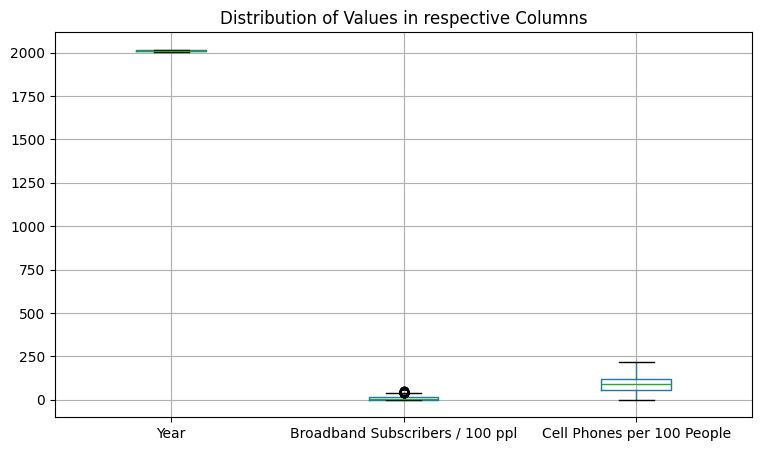

In [13]:
# plotting a boxplot of the numerical columns (to check distribution of values)
plt.figure(figsize=(9, 5))

ax = comm.boxplot()
ax.set_title('Distribution of Values in respective Columns');

There are outliers in the Broadband subscirbers column due to the fact that not all countries will have the same number of subscribers as a result of some factors such as the connctivity in those countries.

### Bivariate Analysis

In [14]:
# Calculating the correlation of the numerical columns to each other
comm.corr(numeric_only=True)

,Year,Broadband Subscribers / 100 ppl,Cell Phones per 100 People
Year,1.000000,0.200937,0.340748
Broadband Subscribers / 100 ppl,0.200937,1.000000,0.519842
Cell Phones per 100 People,0.340748,0.519842,1.000000


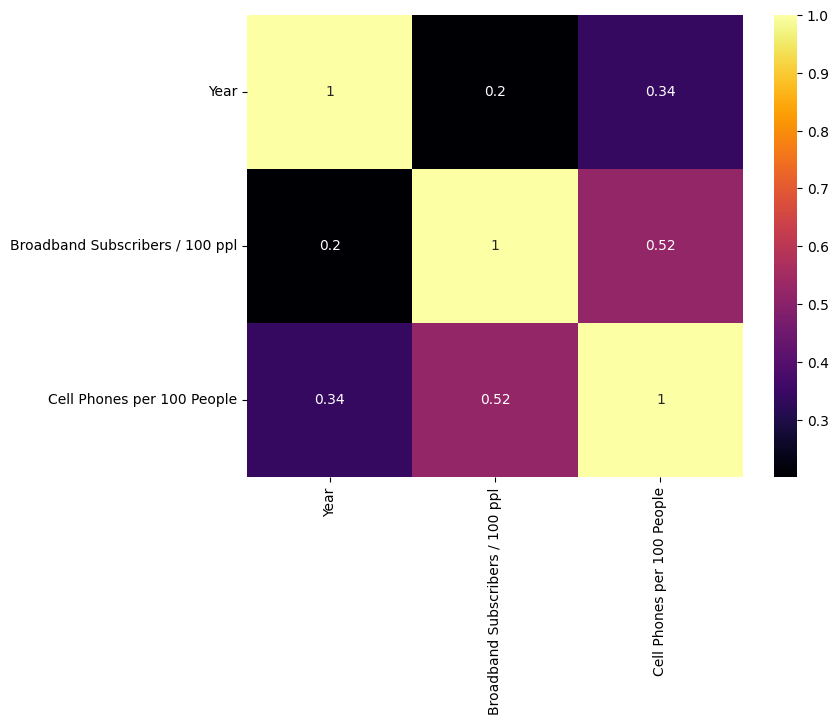

In [15]:
# Plotting a heatmap to visualize the correlation between the columns
plt.figure(figsize=(8, 6))
sns.heatmap(data=comm.corr(numeric_only=True), annot=True, cmap='inferno');

## Analysis

#### Total Number of Subcribers by Country

Due to the large number of countries in the dataset, I decided to slice the top 10 and the bottom 10 for this analysis.

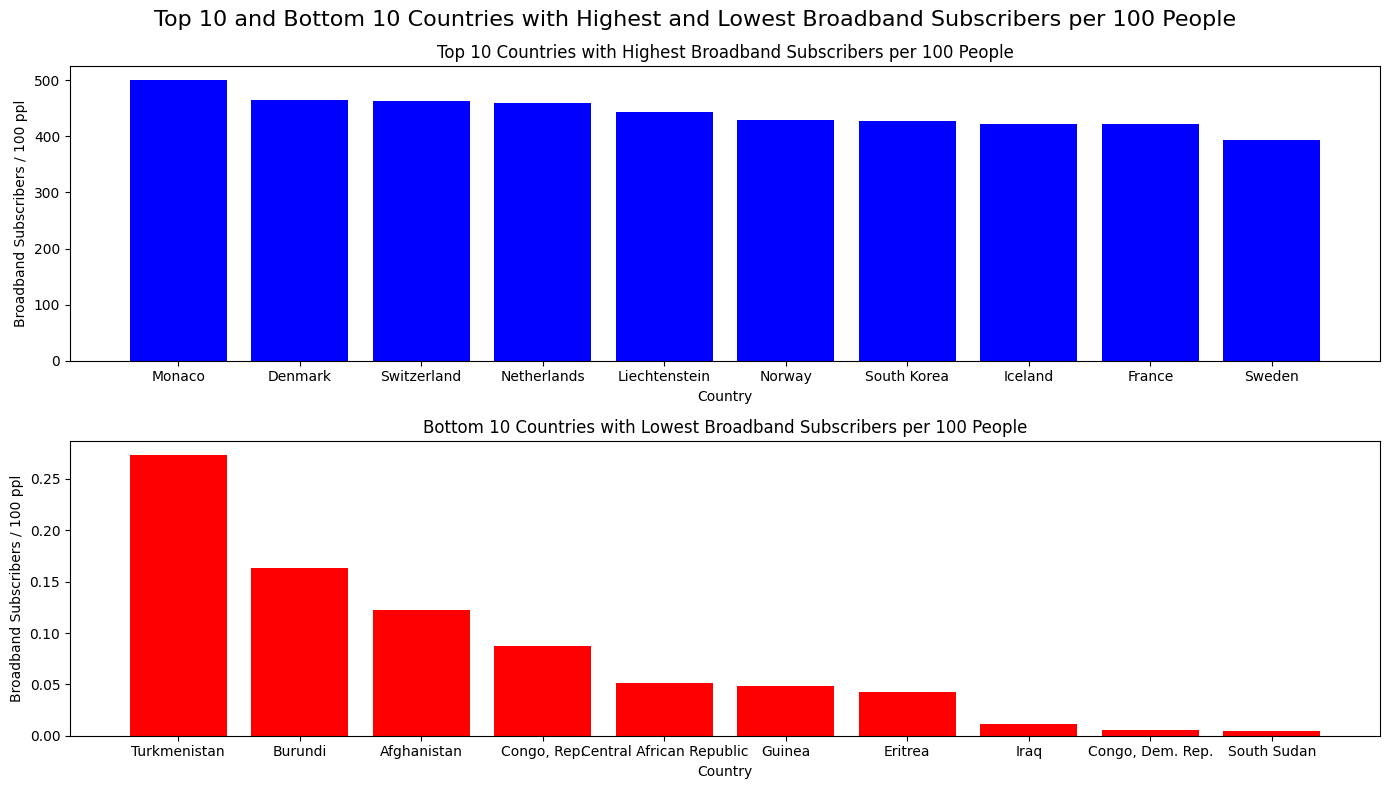

In [37]:
# Grouping the dataframe by country
country_grouped = comm.groupby('Country')[['Broadband Subscribers / 100 ppl', 'Cell Phones per 100 People']].sum()

# Slicing the first ten and last ten by Broadband subscribers
top_10_countries = country_grouped.sort_values(by='Broadband Subscribers / 100 ppl', ascending=False).head(10)
bottom_10_countries = country_grouped.sort_values(by='Broadband Subscribers / 100 ppl', ascending=False).tail(10)

# Plotting bar charts of the first ten and last ten resp.
fig, ax = plt.subplots(2, 1, figsize=(14, 8))
ax[0].bar(top_10_countries.index, top_10_countries['Broadband Subscribers / 100 ppl'], color='blue')
ax[0].set_xlabel('Country')
ax[0].set_ylabel('Broadband Subscribers / 100 ppl')
ax[0].set_title('Top 10 Countries with Highest Broadband Subscribers per 100 People')

ax[1].bar(bottom_10_countries.index, bottom_10_countries['Broadband Subscribers / 100 ppl'], color='red')
ax[1].set_xlabel('Country')
ax[1].set_ylabel('Broadband Subscribers / 100 ppl')
ax[1].set_title('Bottom 10 Countries with Lowest Broadband Subscribers per 100 People')

fig.suptitle('Top 10 and Bottom 10 Countries with Highest and Lowest Broadband Subscribers per 100 People', fontsize=16)
plt.tight_layout()
plt.show()

**Countries outside Africa record higher broadband subscribers counts** compared to African countries. The leading countries tend to have **more advanced technological infrastructure and supportive regulatory environments that encourage broadband adoption**. In contrast, countries with the lowest subscriber numbers **may face challenges** such as** **limited infrastructure, lower affordability, or restrictive policies** that hinder service expansion.


### Subscriber Count vs Mobile Phone Penetration

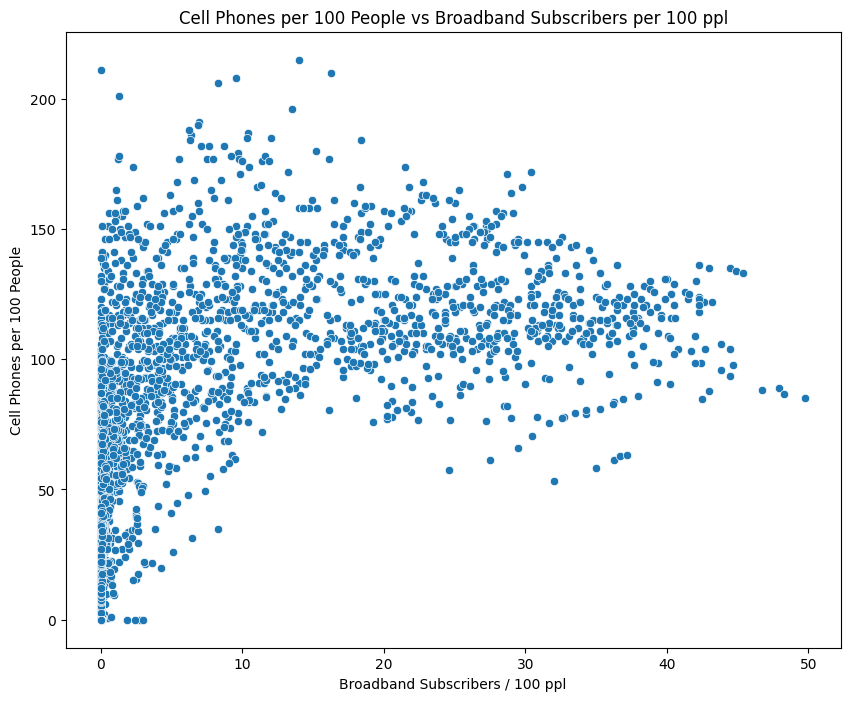

In [43]:
# Plotting a scatterplot of the subscriber count vs mobile phone penetration
plt.figure(figsize=(10, 8))
sns.scatterplot(data = comm, x='Broadband Subscribers / 100 ppl', y='Cell Phones per 100 People')
plt.title('Cell Phones per 100 People vs Broadband Subscribers per 100 ppl');

The data shows **no strong correlation** between the number of broadband subscribers per 100 people and the number of mobile phones per 100 people.

In some markets, **high mobile phone penetration coexists with low broadband subscription rates** - likely due to **affordability constraints, reliance on mobile data, or limited fixed-line infrastructure**. These markets **present significant opportunities for telcom companies** to expand broadband services and capture untapped demand.

### Mobile Phone Penetration and number of Subscribers over time

<Axes: xlabel='Year'>

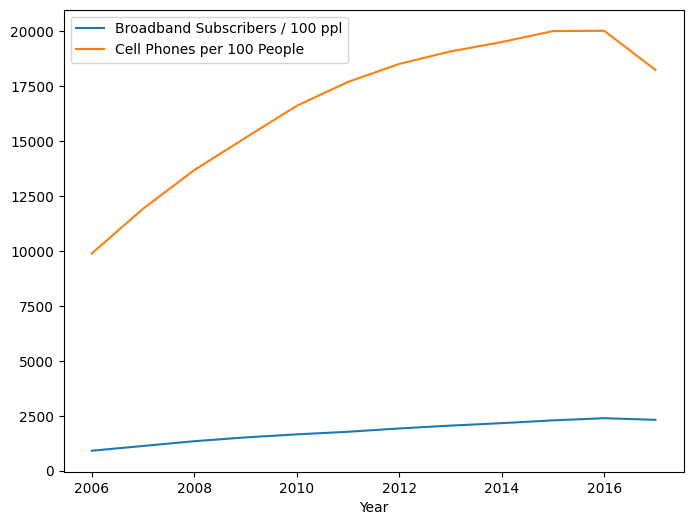

In [46]:
# Grouping the dataframe by year
year_grouped = comm.groupby('Year')[['Broadband Subscribers / 100 ppl', 'Cell Phones per 100 People']].sum()

# Plotting a line graph to visualize the trend over time
year_grouped.plot(kind='line', figsize=(8, 6))

Between 2006 and 2010, **mobile phone penetration rose sharply before experiencing a gradual decline by 2016.**

Broadband subscriptions **grew steadily throughout the decade**, but saw a **slight drop after 2016**, which may be linked to the slowdown in mobile phone penetration. This suggests that **mobile access trends could play a role in influencing broadband adoption rates over time.**

## Conclusions

- **Countries outside Africa record more broadband subscribers than those within Africa**, proving that factors such as **technological infrastructure and regulatory envrionments** play a part in subscriber counts in a country
- There are some markets where **low subscriber counts coexists with high mobile phone penetration** likely due to affordability constraints.
- **Temporal trends** - Mobile phone penetration fluctuates with an increase from 2006 to 2010 and a gradual decline in 2016. Broadband subscriber counts gradually increased for a decade then experiencing slight drop after 2016.

## Insights

- Identify **regional laws that seem to be hindering the mobile phone penetration and telecommunication services**.
- Regional agencies and countries within Africa e.g. Burundi, can **reach out to private development agencies** for help in developing technological infrastructure.
- Telcom companies should **expand their services to those countries with low subscriber counts** especially within Africa.